In [60]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt 

In [28]:
air=pd.read_csv("C:\\ExcelR\\Assignments\\Assignmnet 7\\EastWestAirlines.csv")

In [29]:
air.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [30]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [31]:
air.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [32]:
air.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [33]:
airs=air.drop(['ID#'],axis=1)

In [34]:
df=airs.iloc[:,:].values

In [35]:
x=MinMaxScaler().fit_transform(df)

# Hierarchical Clustering

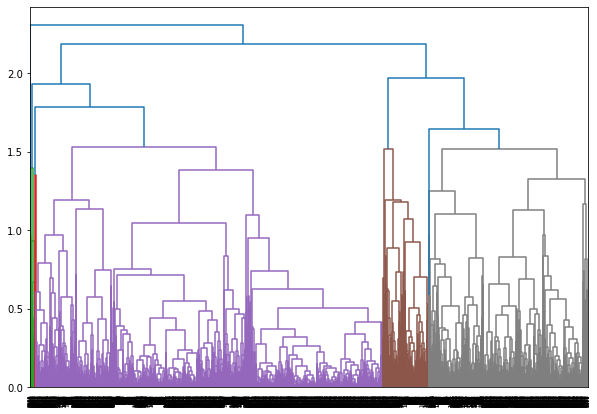

In [36]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(x, method='complete'))

In [37]:
hc=AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='complete')

In [38]:
clusters_hc=hc.fit_predict(x)

In [39]:
md=pd.Series(clusters_hc)  
airs['clusters_hc']=md
airs.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hc
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [53]:
airs.clusters_hc.value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: clusters_hc, dtype: int64

In [40]:
airs.groupby('clusters_hc').agg(['mean']).reset_index()

,clusters_hc,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


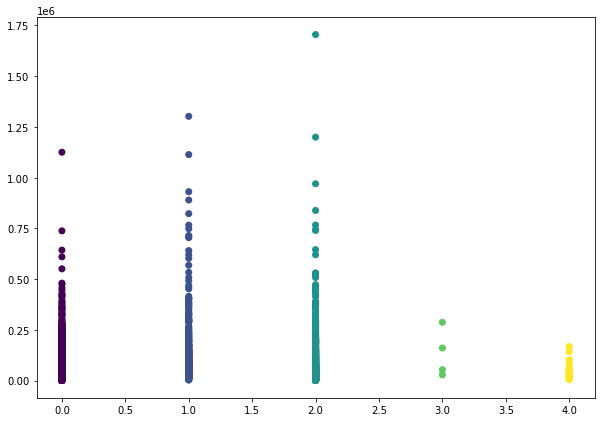

In [41]:
plt.figure(figsize=(10, 7))  
plt.scatter(airs['clusters_hc'],airs['Balance'], c=hc.labels_) 

form these we can conclude that there are less passengers who are having more balance miles left for award travel

# Kmeans Clustering

In [43]:
airs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
 11  clusters_hc        3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [44]:
airs_km=airs.drop(['clusters_hc'],axis=1)

In [45]:
airs_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


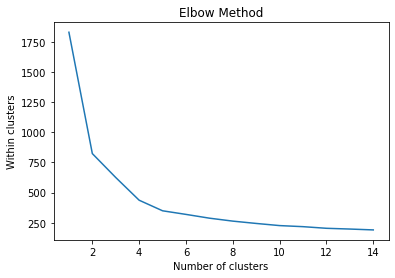

In [46]:
within_clusters=[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    within_clusters.append(kmeans.inertia_)
    
plt.plot(range(1,15),within_clusters)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within clusters')
plt.show()

here within cluster distance is optimul for k=5, therefore fro Kmeans clustering process we will be taking k=5

In [47]:
clusters_km=KMeans(5,random_state=60)
clusters_km.fit(x)

KMeans(n_clusters=5, random_state=60)

In [48]:
airs_km['cluster_km']=clusters_km.labels_

In [54]:
airs_km.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_km
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [55]:
airs_km.cluster_km.value_counts()

2    1032
4     868
3     808
1     673
0     618
Name: cluster_km, dtype: int64

In [50]:
airs_km.groupby('cluster_km').agg(['mean']).reset_index()

,cluster_km,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0
1,1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1
2,2,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0
3,3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1
4,4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0


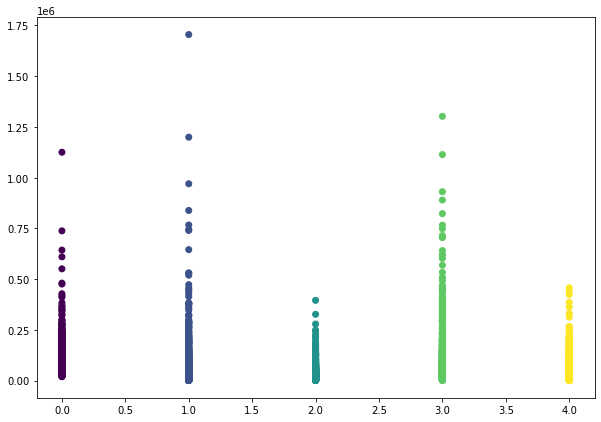

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(airs_km['cluster_km'],airs_km['Balance'], c=clusters_km.labels_) 

from K-Means clustering pprocess we can say that there are more people who miles for awrd travel is greater than 1.3L

# DBSCAN Clustering

In [56]:
airs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
 11  clusters_hc        3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [57]:
airs_db=airs.drop(['clusters_hc'],axis=1)

In [58]:
airs_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [131]:
clusters_db=DBSCAN(eps=0.5, min_samples=8)
clusters_db.fit(x)

DBSCAN(min_samples=8)

In [132]:
airs_db['clusters_db']=clusters_db.labels_

In [133]:
airs_db.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_db
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [134]:
airs_db.clusters_db.value_counts()

 0    2486
 1    1450
-1      28
 2      16
 4      10
 3       9
Name: clusters_db, dtype: int64

In [142]:
airs_db.groupby('clusters_db').agg(['mean']).reset_index()

,clusters_db,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,178934.714286,127.500000,2.571429,1.5,2.571429,73011.392857,32.821429,3811.607143,10.892857,4341.892857,0.75
1,0,59581.308126,88.730088,1.709171,1.0,1.001609,10053.188656,9.055511,226.570394,0.651649,3823.383347,0.00
2,1,95908.293793,242.869655,2.675172,1.0,1.000690,28358.131034,15.464138,799.014483,2.435172,4628.304138,1.00
3,2,39218.500000,0.000000,1.000000,2.0,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.00
4,3,51096.000000,0.000000,1.000000,3.0,1.000000,15561.666667,14.333333,44.444444,0.222222,3603.444444,0.00
5,4,104801.900000,0.000000,1.100000,2.0,1.000000,11932.100000,19.700000,746.300000,2.200000,4396.400000,1.00


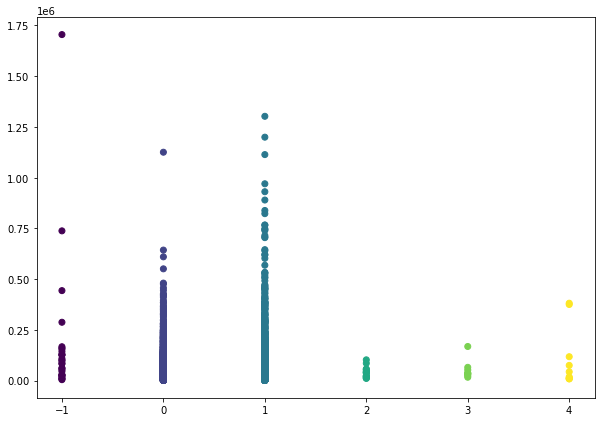

In [140]:
plt.figure(figsize=(10, 7))  
plt.scatter(airs_db['clusters_db'],airs_db['Balance'], c=clusters_db.labels_) 

Here the cluster -1 is showing noise points which means this row aremaking to much biasedness for clustering classifiacation